## Importing the libraries

In [393]:
import numpy as np
import pandas as pd
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS

## Data Collection and Processing

In [394]:
bigmart_train_data=pd.read_csv("D:\\2.ML & Python\\4.Internship\\Technocolabs\\Project 01\\Train.CSV")   #Loading the train data from csv file to Pandas DataFrame
bigmart_test_data=pd.read_csv("D:\\2.ML & Python\\4.Internship\\Technocolabs\\Project 01\\Test.CSV")   #Loading the test data from csv file to Pandas DataFrame

In [395]:
bigmart_train_data.head()   #First 05 rows of the train data set

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [396]:
bigmart_test_data.head()   #First 05 rows of the test data set

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [397]:
bigmart_train_data.shape   #Number of data points & number of features(rows & columns)

(8523, 12)

In [398]:
bigmart_test_data.shape

(5681, 11)

In [399]:
bigmart_train_data.info()   #Information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [400]:
bigmart_train_data.isnull().sum().sort_values(ascending=False)   #Checking the missing values of train data set

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [401]:
bigmart_test_data.isnull().sum().sort_values(ascending=False)   #Checking the missing values of test data set

Outlet_Size                  1606
Item_Weight                   976
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

<Axes: >

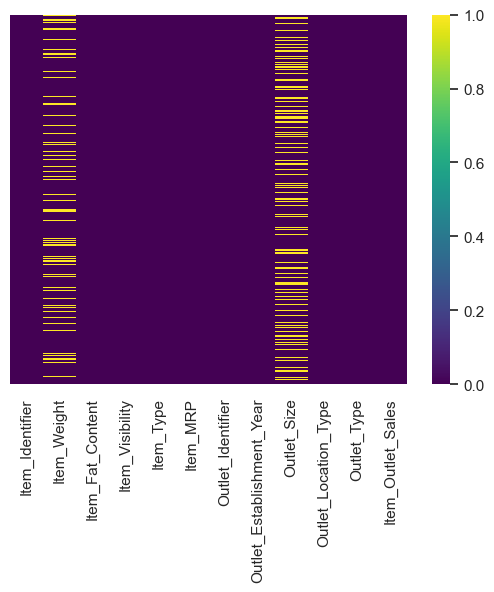

In [402]:
sns.heatmap(bigmart_train_data.isnull(),yticklabels=False,cmap="viridis")

<Axes: >

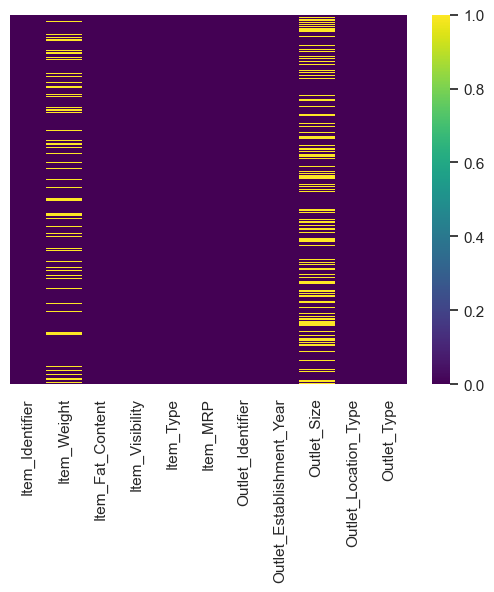

In [403]:
sns.heatmap(bigmart_test_data.isnull(),yticklabels=False,cmap="viridis")

In [404]:
bigmart_train_data.describe()   #Statistical info about the train data set

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [405]:
bigmart_train_data.apply(lambda x: len(x.unique()))   #Check unique values of the train data set

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [406]:
#Check the categorical attributes
cat_col=[]
for x in bigmart_train_data.dtypes.index:
    if bigmart_train_data.dtypes[x]=="object":
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [407]:
cat_col.remove("Item_Identifier")
cat_col.remove("Outlet_Identifier")
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [408]:
#Print the categorical columns
for i in cat_col:
    print(bigmart_train_data[i].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64



## Handling Missing Values

In [409]:
bigmart_train_mean=bigmart_train_data['Item_Weight'].mean()   #Check the train mean value of "Item_Weight" column
bigmart_train_mean

12.857645184135976

In [410]:
bigmart_test_mean=bigmart_test_data['Item_Weight'].mean()   #Check the test mean value of "Item_Weight" column
bigmart_test_mean

12.695633368756642

In [411]:
bigmart_train_data['Item_Weight'].fillna(bigmart_train_mean, inplace=True)   #Filling the missing values in "Item_weight column" with "Mean" value
bigmart_test_data['Item_Weight'].fillna(bigmart_test_mean, inplace=True)

In [412]:
bigmart_train_data['Outlet_Size'].mode()   #Check the mode of "Outlet_Size" column

0    Medium
Name: Outlet_Size, dtype: object

In [413]:
bigmart_test_data['Outlet_Size'].mode()   #Check the mode of "Outlet_Size" column

0    Medium
Name: Outlet_Size, dtype: object

In [414]:
mode_outletsize_train = bigmart_train_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))   #Filling the missing values in "Outlet_Size" column with Mode
print(mode_outletsize_train)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [415]:
mode_outletsize_test = bigmart_test_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))   #Filling the missing values in "Outlet_Size" column with Mode
print(mode_outletsize_test)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [416]:
miss_values_train = bigmart_train_data['Outlet_Size'].isnull() 
miss_values_test = bigmart_test_data['Outlet_Size'].isnull() 

In [417]:
bigmart_train_data.loc[miss_values_train, 'Outlet_Size'] = bigmart_train_data.loc[miss_values_train,'Outlet_Type'].apply(lambda x: mode_outletsize_train[x])
bigmart_test_data.loc[miss_values_test, 'Outlet_Size'] = bigmart_test_data.loc[miss_values_test,'Outlet_Type'].apply(lambda x: mode_outletsize_test[x])

In [418]:
bigmart_train_data.isnull().sum()   #Checking for missing values

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [419]:
bigmart_test_data.isnull().sum()   #Checking for missing values

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

<Axes: >

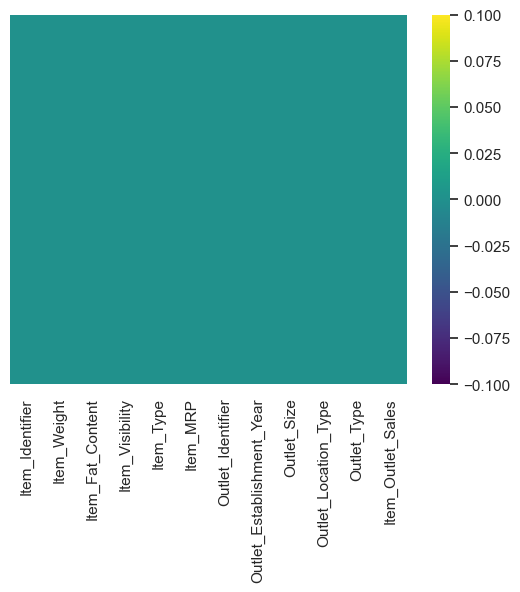

In [420]:
sns.heatmap(bigmart_train_data.isnull(),yticklabels=False,cmap="viridis")

<Axes: >

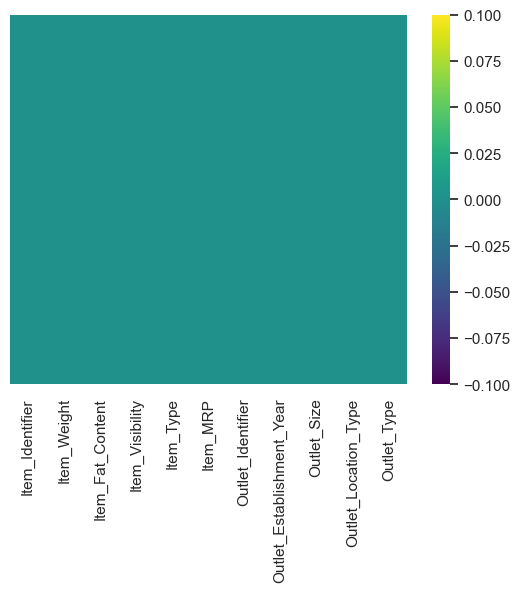

In [421]:
sns.heatmap(bigmart_test_data.isnull(),yticklabels=False,cmap="viridis")

In [422]:
bigmart_train_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [423]:
bigmart_train_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)
bigmart_test_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [424]:
bigmart_train_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [425]:
bigmart_test_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3668
Regular    2013
Name: count, dtype: int64

In [426]:
bigmart_train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [427]:
bigmart_train_data['Outlet_Age']= bigmart_train_data['Outlet_Establishment_Year'].apply(lambda year: 2020 - year)
bigmart_test_data['Outlet_Age']= bigmart_test_data['Outlet_Establishment_Year'].apply(lambda year: 2020 - year)

In [428]:
bigmart_train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33


## Numerical Features - Train data set

In [429]:
sns.set()

C:\Users\Reshan Perera\AppData\Local\Temp\ipykernel_10436\1753659522.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bigmart_train_data['Item_Weight'])   #Item_Weight distribution


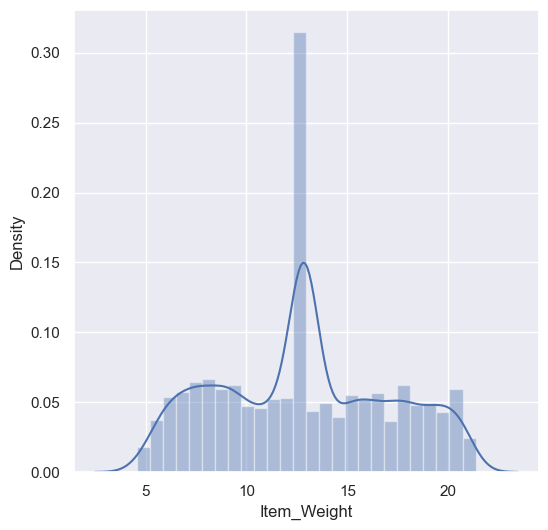

In [430]:
plt.figure(figsize=(6,6))
sns.distplot(bigmart_train_data['Item_Weight'])   #Item_Weight distribution
plt.show()

C:\Users\Reshan Perera\AppData\Local\Temp\ipykernel_10436\3533815224.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bigmart_train_data['Item_Visibility'])   #Item Visibility distribution


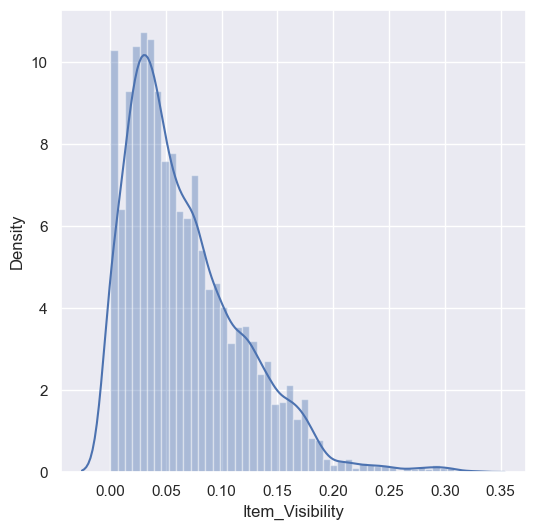

In [431]:
plt.figure(figsize=(6,6))
sns.distplot(bigmart_train_data['Item_Visibility'])   #Item Visibility distribution
plt.show()

C:\Users\Reshan Perera\AppData\Local\Temp\ipykernel_10436\2118348536.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bigmart_train_data['Item_MRP'])   #Item MRP distribution


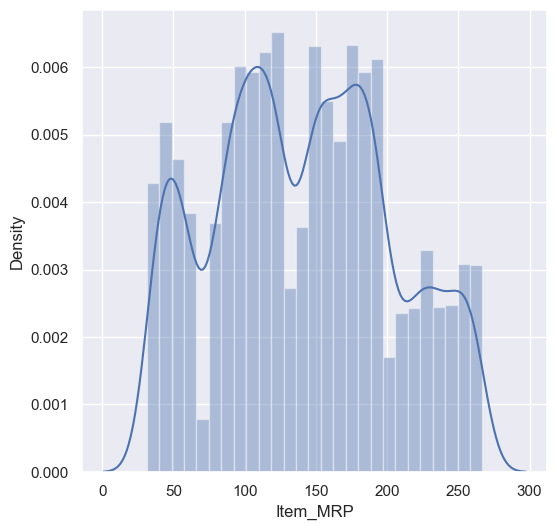

In [432]:
plt.figure(figsize=(6,6))
sns.distplot(bigmart_train_data['Item_MRP'])   #Item MRP distribution
plt.show()

C:\Users\Reshan Perera\AppData\Local\Temp\ipykernel_10436\3940299908.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bigmart_train_data['Item_Outlet_Sales'])   #Item_Outlet_Sales distribution


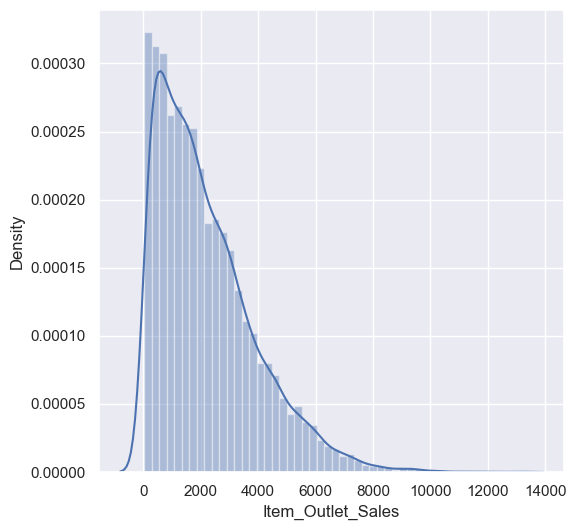

In [433]:
plt.figure(figsize=(6,6))
sns.distplot(bigmart_train_data['Item_Outlet_Sales'])   #Item_Outlet_Sales distribution
plt.show()

## Exploratory Data Analysis - Train data set

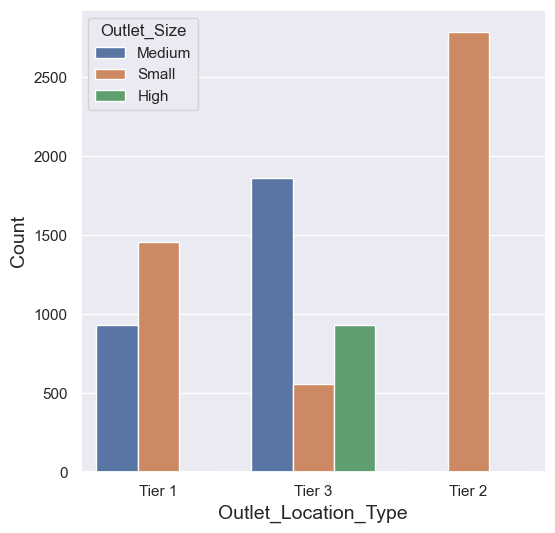

In [434]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Location_Type', hue="Outlet_Size", data=bigmart_train_data)   #Outlet_Location_Type column
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

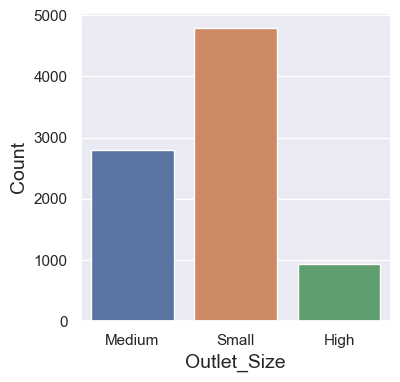

In [435]:
plt.figure(figsize=(4,4))
sns.countplot(x='Outlet_Size', data=bigmart_train_data)   #Outlet_Size column
plt.xlabel('Outlet_Size', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

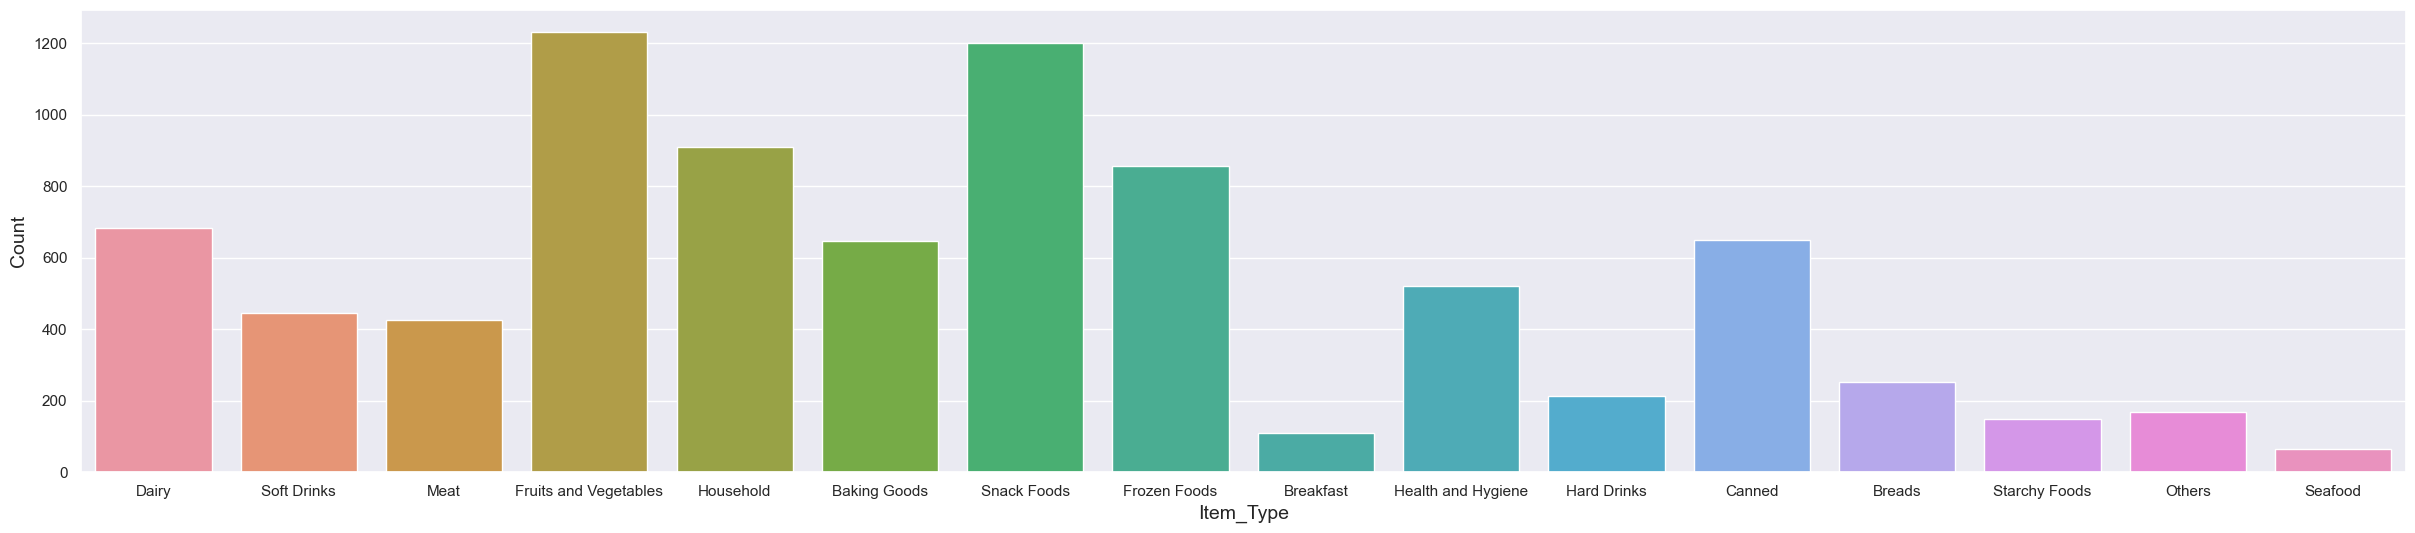

In [436]:
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=bigmart_train_data)   #Item_Type column
plt.xlabel('Item_Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

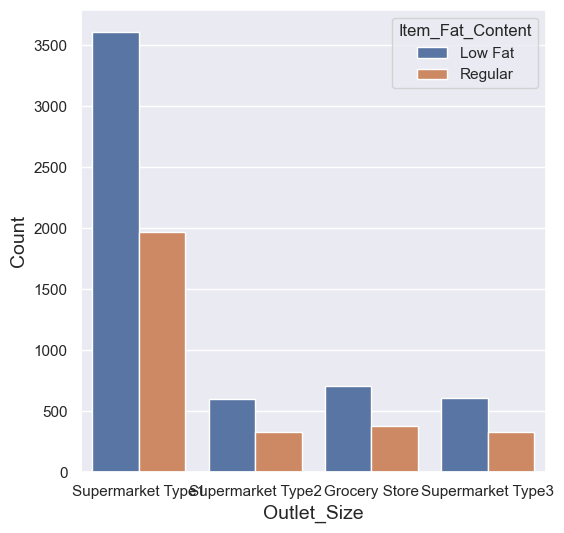

In [437]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Type', hue="Item_Fat_Content", data=bigmart_train_data)   #Outlet_Type column
plt.xlabel('Outlet_Size', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

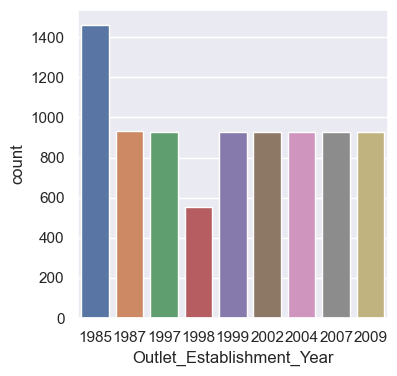

In [438]:
plt.figure(figsize=(4,4))
sns.countplot(x='Outlet_Establishment_Year', data=bigmart_train_data)   #Outlet_Establishment_Year column
plt.show()

<Axes: xlabel='Outlet_Size', ylabel='Item_Weight'>

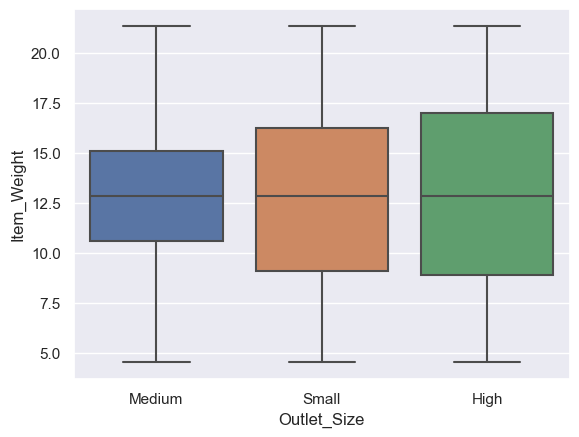

In [439]:
sns.boxplot(x="Outlet_Size",y="Item_Weight",data=bigmart_train_data)

<Axes: xlabel='Outlet_Type', ylabel='Item_Visibility'>

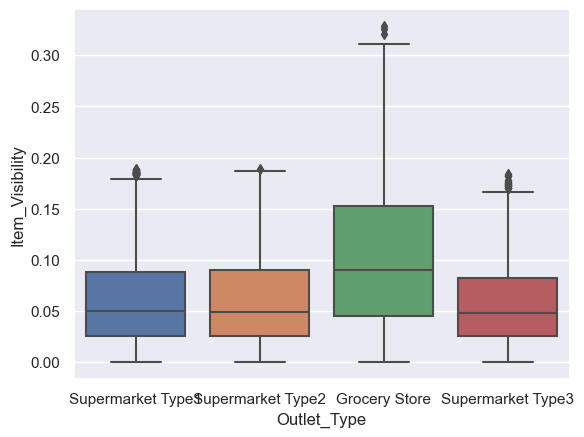

In [440]:
sns.boxplot(x="Outlet_Type",y="Item_Visibility",data=bigmart_train_data)

In [441]:
bigmart_train_data.apply(lambda x: len(x.unique())) 

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
Outlet_Age                      9
dtype: int64

## Converting Categorical To Numerical

In [442]:
bigmart_train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33


In [443]:
encoder = LabelEncoder()

In [444]:
bigmart_train_data['Outlet_Identifier'] = encoder.fit_transform(bigmart_train_data['Outlet_Identifier'])   #Encode the Outlet_Identifier
bigmart_test_data['Outlet_Identifier'] = encoder.fit_transform(bigmart_test_data['Outlet_Identifier'])

In [445]:
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [446]:
cat_col.append("Outlet_Establishment_Year")

In [447]:
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Outlet_Establishment_Year']

In [448]:
bigmart_train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,9,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,3,2009,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,9,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,0,1998,Small,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,1,1987,High,Tier 3,Supermarket Type1,994.7052,33


In [449]:
bigmart_train_data  = bigmart_train_data.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)
bigmart_test_data  = bigmart_test_data.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)

In [450]:
bigmart_train_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age
0,9.30,Low Fat,0.016047,249.8092,Medium,Tier 1,3735.1380,21
1,5.92,Regular,0.019278,48.2692,Medium,Tier 3,443.4228,11
2,17.50,Low Fat,0.016760,141.6180,Medium,Tier 1,2097.2700,21
3,19.20,Regular,0.000000,182.0950,Small,Tier 3,732.3800,22
4,8.93,Low Fat,0.000000,53.8614,High,Tier 3,994.7052,33


In [451]:
bigmart_train_data=pd.get_dummies(bigmart_train_data,columns=["Item_Fat_Content","Outlet_Size","Outlet_Location_Type","Outlet_Age"],dtype=int)
bigmart_train_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,...,Outlet_Location_Type_Tier 3,Outlet_Age_11,Outlet_Age_13,Outlet_Age_16,Outlet_Age_18,Outlet_Age_21,Outlet_Age_22,Outlet_Age_23,Outlet_Age_33,Outlet_Age_35
0,9.30,0.016047,249.8092,3735.1380,1,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
1,5.92,0.019278,48.2692,443.4228,0,1,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
2,17.50,0.016760,141.6180,2097.2700,1,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
3,19.20,0.000000,182.0950,732.3800,0,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
4,8.93,0.000000,53.8614,994.7052,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [452]:
bigmart_test_data=pd.get_dummies(bigmart_test_data,columns=["Item_Fat_Content","Outlet_Size","Outlet_Location_Type","Outlet_Age"],dtype=int)
bigmart_test_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Age_11,Outlet_Age_13,Outlet_Age_16,Outlet_Age_18,Outlet_Age_21,Outlet_Age_22,Outlet_Age_23,Outlet_Age_33,Outlet_Age_35
0,20.750000,0.007565,107.8622,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
1,8.300000,0.038428,87.3198,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0
2,14.600000,0.099575,241.7538,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
3,7.315000,0.015388,155.0340,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0
4,12.695633,0.118599,234.2300,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1


## Seperating Training And Test Data

In [453]:
X = bigmart_train_data.drop(columns=['Item_Outlet_Sales'], axis=1)
Y = bigmart_train_data['Item_Outlet_Sales']

In [454]:
print(X)

      Item_Weight  Item_Visibility  Item_MRP  Item_Fat_Content_Low Fat  \
0           9.300         0.016047  249.8092                         1   
1           5.920         0.019278   48.2692                         0   
2          17.500         0.016760  141.6180                         1   
3          19.200         0.000000  182.0950                         0   
4           8.930         0.000000   53.8614                         1   
...           ...              ...       ...                       ...   
8518        6.865         0.056783  214.5218                         1   
8519        8.380         0.046982  108.1570                         0   
8520       10.600         0.035186   85.1224                         1   
8521        7.210         0.145221  103.1332                         0   
8522       14.800         0.044878   75.4670                         1   

      Item_Fat_Content_Regular  Outlet_Size_High  Outlet_Size_Medium  \
0                            0         

In [455]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


In [456]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X.shape, X_train.shape, X_test.shape)

(8523, 20) (6818, 20) (1705, 20)


## Running The Models

## XGBRegressor

In [457]:
regressor1 = XGBRegressor()
regressor1.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [458]:
test_data_prediction1 = regressor1.predict(X_test)   #Prediction on test data

In [459]:
LR1_MAE = round(MAE(Y_test, test_data_prediction1),2)
LR1_RMSE = round(np.sqrt(MSE(Y_test, test_data_prediction1)),2)
LR1_R_2 = round(R2(Y_test, test_data_prediction1),4)

print(f" Mean Absolute Error: {LR1_MAE}\n")
print(f" Root Mean Squared Error: {LR1_RMSE}\n")
print(f" R^2 Score: {LR1_R_2}\n")

 Mean Absolute Error: 852.11

 Root Mean Squared Error: 1208.83

 R^2 Score: 0.5007



In [460]:
test = regressor1.predict(X_train)

In [461]:
R2(Y_train, test)

0.8511385819817603

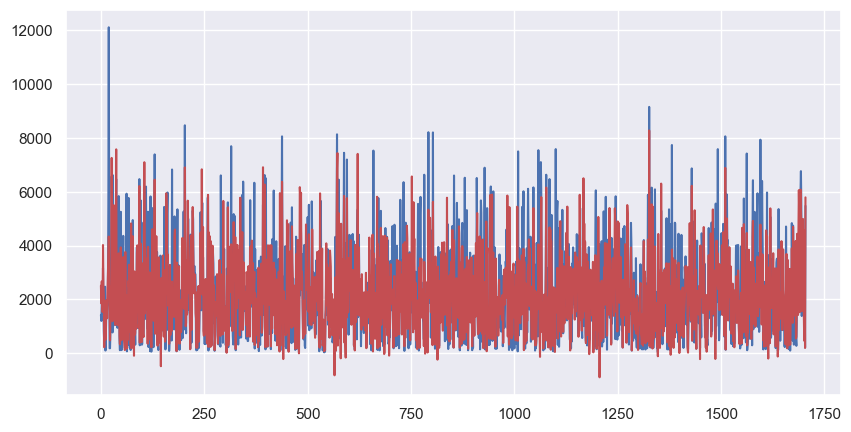

In [462]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(range(len(Y_test)), Y_test, '-b',label='Actual')
ax.plot(range(len(test_data_prediction1)), test_data_prediction1, 'r', label='Predicted')
plt.show()

## LinearRegression

In [463]:
regressor2=LinearRegression()
regressor2.fit(X_train, Y_train)

LinearRegression()

In [464]:
test_data_prediction2 = regressor2.predict(X_test)   #Prediction on test data

In [465]:
LR2_MAE = round(MAE(Y_test, test_data_prediction2),2)
LR2_RMSE = round(np.sqrt(MSE(Y_test, test_data_prediction2)),2)
LR2_R_2 = round(R2(Y_test, test_data_prediction2),4)

print(f" Mean Absolute Error: {LR2_MAE}\n")
print(f" Root Mean Squared Error: {LR2_RMSE}\n")
print(f" R^2 Score: {LR2_R_2}\n")

 Mean Absolute Error: 851.52

 Root Mean Squared Error: 1129.44

 R^2 Score: 0.5642



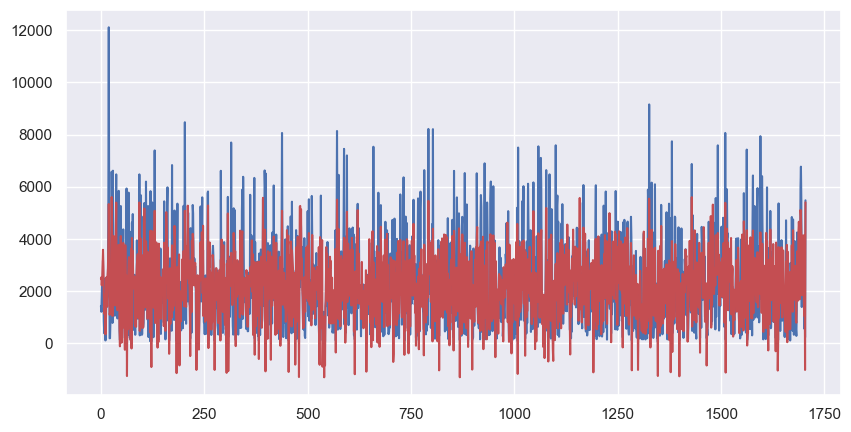

In [466]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(range(len(Y_test)), Y_test, '-b',label='Actual')
ax.plot(range(len(test_data_prediction2)), test_data_prediction2, 'r', label='Predicted')
plt.show()

## RandomForestRegressor

In [467]:
regressor3=RandomForestRegressor(n_estimators=500)
regressor3.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=500)

In [468]:
test_data_prediction3 = regressor3.predict(X_test)   #Prediction on test data

In [469]:
LR3_MAE = round(MAE(Y_test, test_data_prediction3),2)
LR3_RMSE = round(np.sqrt(MSE(Y_test, test_data_prediction3)),2)
LR3_R_2 = round(R2(Y_test, test_data_prediction3),4)

print(f" Mean Absolute Error: {LR3_MAE}\n")
print(f" Root Mean Squared Error: {LR3_RMSE}\n")
print(f" R^2 Score: {LR3_R_2}\n")

 Mean Absolute Error: 808.44

 Root Mean Squared Error: 1136.69

 R^2 Score: 0.5585



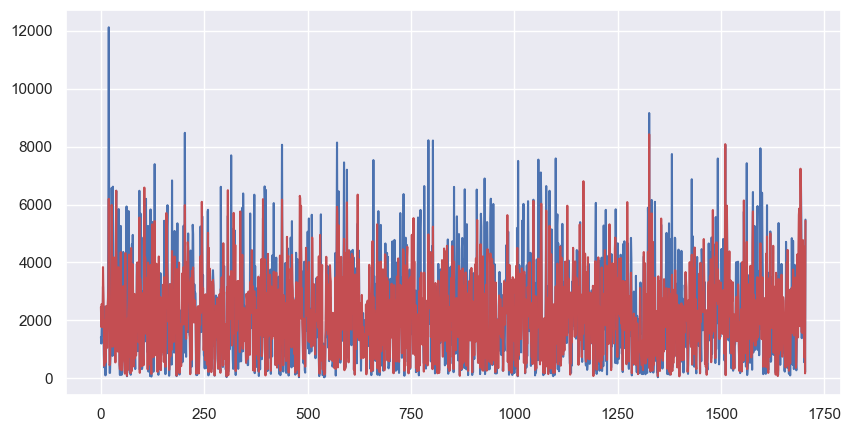

In [470]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(range(len(Y_test)), Y_test, '-b',label='Actual')
ax.plot(range(len(test_data_prediction3)), test_data_prediction3, 'r', label='Predicted')
plt.show()

## Final Predictions On The Test Dataset

In [471]:
bigmart_test_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Age_11,Outlet_Age_13,Outlet_Age_16,Outlet_Age_18,Outlet_Age_21,Outlet_Age_22,Outlet_Age_23,Outlet_Age_33,Outlet_Age_35
0,20.750000,0.007565,107.8622,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
1,8.300000,0.038428,87.3198,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0
2,14.600000,0.099575,241.7538,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
3,7.315000,0.015388,155.0340,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0
4,12.695633,0.118599,234.2300,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1


In [472]:
Test_prediction=regressor2.predict(bigmart_test_data)   #Prediction on test data using LinearRegression

In [473]:
print(Test_prediction)

[1845.84568766 1602.59966126 1916.58890817 ... 1841.1022819  3581.07392205
 1271.22299311]
